In [17]:
pip install pmdarima

In [77]:
import yfinance as yf
import numpy as np
import torch.nn as nn
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Đọc dữ liệu từ drive
from google.colab import drive
drive.mount('/content/drive')
# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/Ky_2_nam_3/DA/bnb.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...,...
1914,2024-05-27,599.825928,613.388184,599.700745,603.526428,603.526428,1691663828
1915,2024-05-28,603.526428,604.985107,593.716187,601.213257,601.213257,1852329404
1916,2024-05-29,601.213257,602.931519,592.966614,594.972046,594.972046,1642696946
1917,2024-05-30,594.972534,601.665039,586.557678,595.026794,595.026794,1737524745


In [129]:
# Lấy dữ liệu cần phân tích
time_series_Close = data['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(7:2:1)
# Kích thước tập dữ liệu (7:2:1)
train_size_721 = int(0.7 * len(time_series_Close))
test_size_721 = int(0.2 * len(time_series_Close))
val_size_721 = int(len(time_series_Close) - train_size_721 - test_size_721)
# Giá trị tập từ liệu (7:2:1)
train_data_721 = time_series_Close[:train_size_721]
test_data_721 = time_series_Close[train_size_721:train_size_721 + test_size_721]
val_data_721 = time_series_Close[-val_size_721:]
# val_data_721 = time_series_Close[-val_size_721:]
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(6:2:2)
# Kích thước tập dữ liệu (6:2:2)
train_size_622 = int(0.6 * len(time_series_Close))
test_size_622 = int(0.2 * len(time_series_Close))
val_size_622 = int(len(time_series_Close) - train_size_622 - test_size_622)
# Giá trị tập từ liệu (6:2:2)
train_data_622 = time_series_Close[:train_size_622]
test_data_622 = time_series_Close[train_size_622:train_size_622 + test_size_622]
val_data_622 = time_series_Close[-val_size_622:]

In [211]:
val_size_622

385

In [130]:
# Lấy dữ liệu Date cần phân tích để dự bảo DL trên tập test và train
time_series_Date = data['Date']

# Tỉ lệ 7:2:1

# Kích thước tập dữ liệu (7:2:1)
train_date_size_721 = int(0.7 * len(time_series_Date))
test_date_size_721 = int(0.2 * len(time_series_Date))
val_date_size_721 = int(len(time_series_Date) - train_date_size_721 - test_date_size_721)
# Giá trị tập từ liệu (7:2:1)
train_date_data_721 = time_series_Date[:train_date_size_721]
test_date_data_721 = time_series_Date[train_date_size_721:train_date_size_721 + test_date_size_721]
val_date_data_721 = time_series_Date[-val_date_size_721:]

# train_Date_721 = time_series_Date[:int(0.7* len(time_series_Date))]
# test_Date_721 = time_series_Date[int(0.7 * len(time_series_Date)):int(0.7 * len(time_series_Date)) + int(0.2 * len(time_series_Date))]
# val_Date_721 = time_series_Date[int(0.7* len(time_series_Date)):int(0.7 * len(time_series_Date)) + int(0.1* len(time_series_Date))]

first_Date_721 = test_date_data_721.min()
first_Date_721_2 = test_date_data_721.max()

print(first_Date_721)
print(first_Date_721_2)

# Tỉ lệ 6:2:2
# Kích thước tập dữ liệu (7:2:1)
train_date_size_622 = int(0.6 * len(time_series_Date))
test_date_size_622 = int(0.2 * len(time_series_Date))
val_date_size_622 = int(len(time_series_Date) - train_date_size_622 - test_date_size_622)
# Giá trị tập từ liệu (7:2:1)
train_date_data_622 = time_series_Date[:train_date_size_622]
test_date_data_622 = time_series_Date[train_date_size_622:train_date_size_622 + test_date_size_622]
val_date_data_622 = time_series_Date[-val_date_size_622:]

# train_Date_622 = time_series_Date[:int(0.6* len(time_series_Date))]
# test_Date_622 = time_series_Date[int(0.6 * len(time_series_Date)):int(0.6 * len(time_series_Date)) + int(0.2 * len(time_series_Date))]
# val_Date_622 = time_series_Date[int(0.6* len(time_series_Date)):int(0.6 * len(time_series_Date)) + int(0.2* len(time_series_Date))]

first_date_Date_622 = test_date_data_622.min()
first_date_Date_622_2 = test_date_data_622.max()

print(first_date_Date_622)
print(first_date_Date_622_2)


2022-11-03 00:00:00
2023-11-20 00:00:00
2022-04-25 00:00:00
2023-05-12 00:00:00


In [ ]:
auto_arima(train_data_721, maxiter=100)

ARIMA(maxiter=100, order=(4, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
auto_arima(train_data_622, maxiter=100)

ARIMA(maxiter=100, order=(4, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [194]:
# 7:2:1
model = ARIMA(train_data_721, order=(4,1,4))
fit_model_721= model.fit()

# Dự đoán trên tập kiểm tra
predictions_721 = fit_model_721.forecast(steps=len(test_data_721))

# Dự báo cho 30 ngày tiếp theo
forecast_steps = 30
forecast = fit_model_721.forecast(steps=forecast_steps)
last_date=time_series_Date.max()
# Tạo một danh sách rỗng để lưu trữ dự báo
forecast_values = []
# In ra dự báo cho 30 ngày tiếp theo
print("Predicted Output for the next 30 days:")
for i, value in enumerate(forecast):
    # In ra ngày tương ứng với dự báo
    print(f"Day {i+1}: {last_date + pd.DateOffset(days=i+1)} - Predicted: {value}")
    # Thêm giá trị dự báo vào danh sách
    forecast_values.append(value)

Predicted Output for the next 30 days:
Day 1: 2024-06-01 00:00:00 - Predicted: 320.87597385880736
Day 2: 2024-06-02 00:00:00 - Predicted: 320.3982995090954
Day 3: 2024-06-03 00:00:00 - Predicted: 319.9430700138976
Day 4: 2024-06-04 00:00:00 - Predicted: 320.62217482911143
Day 5: 2024-06-05 00:00:00 - Predicted: 320.6050749940426
Day 6: 2024-06-06 00:00:00 - Predicted: 320.16828146695457
Day 7: 2024-06-07 00:00:00 - Predicted: 320.26088918202566
Day 8: 2024-06-08 00:00:00 - Predicted: 320.65106219401144
Day 9: 2024-06-09 00:00:00 - Predicted: 320.3798398636854
Day 10: 2024-06-10 00:00:00 - Predicted: 320.18514036618393
Day 11: 2024-06-11 00:00:00 - Predicted: 320.48082316994356
Day 12: 2024-06-12 00:00:00 - Predicted: 320.5198361184935
Day 13: 2024-06-13 00:00:00 - Predicted: 320.27026471700106
Day 14: 2024-06-14 00:00:00 - Predicted: 320.3257770954453
Day 15: 2024-06-15 00:00:00 - Predicted: 320.5194807299086
Day 16: 2024-06-16 00:00:00 - Predicted: 320.3894043095094
Day 17: 2024-06-17

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


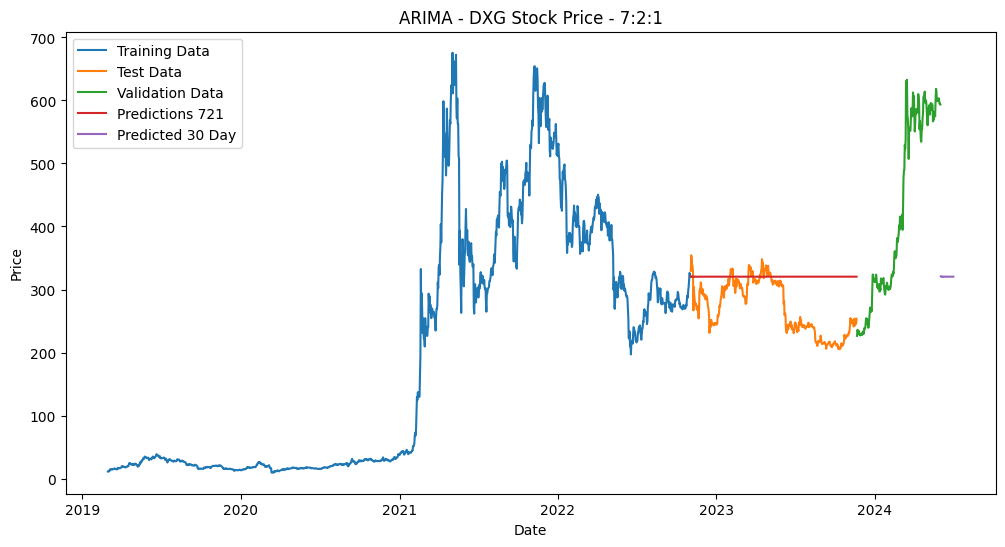

In [196]:
# Trực quan hóa kết quả
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

plt.figure(figsize=(12, 6))
# Plot train data
plt.plot(train_date_data_721, train_data_721, label='Training Data')
# Plot test data
plt.plot(test_date_data_721, test_data_721, label='Test Data')
# Plot validation data
plt.plot(val_date_data_721, val_data_721, label='Validation Data')
# Predictions
plt.plot(test_date_data_721, predictions_721, label='Predictions 721')
# 30 ngày tiếp theo
plt.plot(forecast_dates, forecast, label='Predicted 30 Day')
plt.title('ARIMA - DXG Stock Price - 7:2:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [197]:

# 6:2:2
model = ARIMA(train_data_622, order=(0,0,0))
fit_model_622= model.fit()

# Dự đoán trên tập kiểm tra
predictions_622 = fit_model_622.forecast(steps=len(test_data_622))

# Dự báo cho 30 ngày tiếp theo
forecast_steps = 30
forecast = fit_model_622.forecast(steps=forecast_steps)
last_date=time_series_Date.max()
# Tạo một danh sách rỗng để lưu trữ dự báo
forecast_values = []
# In ra dự báo cho 30 ngày tiếp theo
print("Predicted Output for the next 30 days:")
for i, value in enumerate(forecast):
    # In ra ngày tương ứng với dự báo
    print(f"Day {i+1}: {last_date + pd.DateOffset(days=i+1)} - Predicted: {value}")
    # Thêm giá trị dự báo vào danh sách
    forecast_values.append(value)

Predicted Output for the next 30 days:
Day 1: 2024-06-01 00:00:00 - Predicted: 173.72455424610715
Day 2: 2024-06-02 00:00:00 - Predicted: 173.72455424610715
Day 3: 2024-06-03 00:00:00 - Predicted: 173.72455424610715
Day 4: 2024-06-04 00:00:00 - Predicted: 173.72455424610715
Day 5: 2024-06-05 00:00:00 - Predicted: 173.72455424610715
Day 6: 2024-06-06 00:00:00 - Predicted: 173.72455424610715
Day 7: 2024-06-07 00:00:00 - Predicted: 173.72455424610715
Day 8: 2024-06-08 00:00:00 - Predicted: 173.72455424610715
Day 9: 2024-06-09 00:00:00 - Predicted: 173.72455424610715
Day 10: 2024-06-10 00:00:00 - Predicted: 173.72455424610715
Day 11: 2024-06-11 00:00:00 - Predicted: 173.72455424610715
Day 12: 2024-06-12 00:00:00 - Predicted: 173.72455424610715
Day 13: 2024-06-13 00:00:00 - Predicted: 173.72455424610715
Day 14: 2024-06-14 00:00:00 - Predicted: 173.72455424610715
Day 15: 2024-06-15 00:00:00 - Predicted: 173.72455424610715
Day 16: 2024-06-16 00:00:00 - Predicted: 173.72455424610715
Day 17: 20

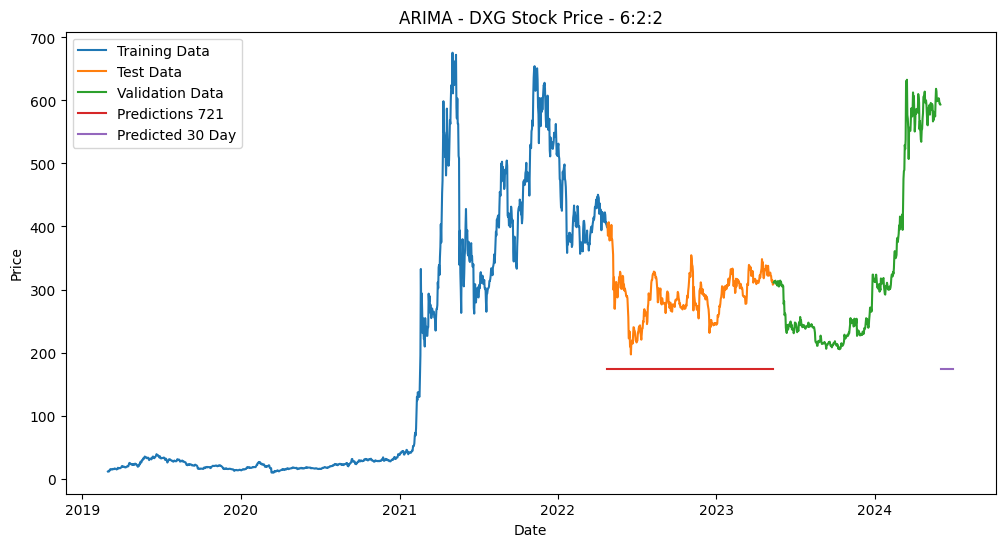

In [201]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
# Plot train data
plt.plot(train_date_data_622, train_data_622, label='Training Data')
# Plot test data
plt.plot(test_date_data_622, test_data_622, label='Test Data')
# Plot validation data
plt.plot(val_date_data_622, val_data_622, label='Validation Data')
# Predictions
plt.plot(test_date_data_622, predictions_622, label='Predictions 721')
# 30 ngày tiếp theo
plt.plot(forecast_dates, forecast, label='Predicted 30 Day')


plt.title('ARIMA - DXG Stock Price - 6:2:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [202]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [203]:
# Tính toán 721
# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_721, predictions_721))

# Tính toán MAE
mae = mean_absolute_error(test_data_721, predictions_721)

mape = mean_absolute_percentage_error(test_data_721, predictions_721)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 65.19366764905145
MAE: 53.03914848930528
MAPE: 22.310301414873873


In [204]:
# Tính toán 622
# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_622, predictions_622))

# Tính toán MAE
mae = mean_absolute_error(test_data_622, predictions_622)

mape = mean_absolute_percentage_error(test_data_622, predictions_622)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 124.08797646124405
MAE: 118.88057363131003
MAPE: 39.71970753331673
